# PLUS TI

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [30]:
%pip install empiricaldist pyjanitor palmerpenguins session-info numpy pandas scipy scikit-learn seaborn statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\marce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

## Cargar los datos

### Utilizando los conjuntos de datos de seaborn

In [32]:
import pandas as pd
sds = pd.read_csv("dataset_feature_engineering.csv")


In [33]:
sds

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,...,False,77.032467,12,3,23,2020,6,3,1,1
1852390,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,...,False,100.023736,12,3,23,2020,5,3,1,1
1852391,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,...,False,80.887812,12,3,23,2020,10,7,1,2
1852392,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,...,False,53.060882,12,3,23,2020,4,2,2,1


### Utilizando la interfaz de Deepnote

Links de importación de datos:

- Conjunto de datos crudos.

- Conjunto de datos previamente procesados.

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [34]:
sds.dtypes

cc_num                               int64
merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           float64
amt_month_s

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [35]:
(
    sds
    .dtypes
    .value_counts()
)

int64      13
object     11
float64    10
bool        1
Name: count, dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

7  columnas o variables y 344 filas 

In [36]:
sds.shape

(1852394, 35)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [37]:
(
    sds
    .isnull()
    .any()
)

cc_num                             False
merchant                           False
category                           False
amt                                False
first                              False
last                               False
gender                             False
street                             False
city                               False
state                              False
zip                                False
lat                                False
long                               False
city_pop                           False
job                                False
dob                                False
trans_num                          False
unix_time                          False
merch_lat                          False
merch_long                         False
is_fraud                           False
amt_month                          False
amt_year                           False
amt_month_shopping_net_spend       False
count_month_shop

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [38]:
(
    sds
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

cc_num                             0
dist_between_client_and_merch      0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
trans_month                        0
merch_lat                          0
trans_day                          0
hour                               0
year                               0
times_shopped_at_merchant          0
times_shopped_at_merchant_year     0
times_shopped_at_merchant_month    0
merch_long                         0
unix_time                          0
merchant                           0
city                               0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
state                              0
t

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [39]:
(
    sds
    .isnull()
    .sum()
    .sum()
)

0

## ¿Cuál es la proporción de valores nulos por cada variable?

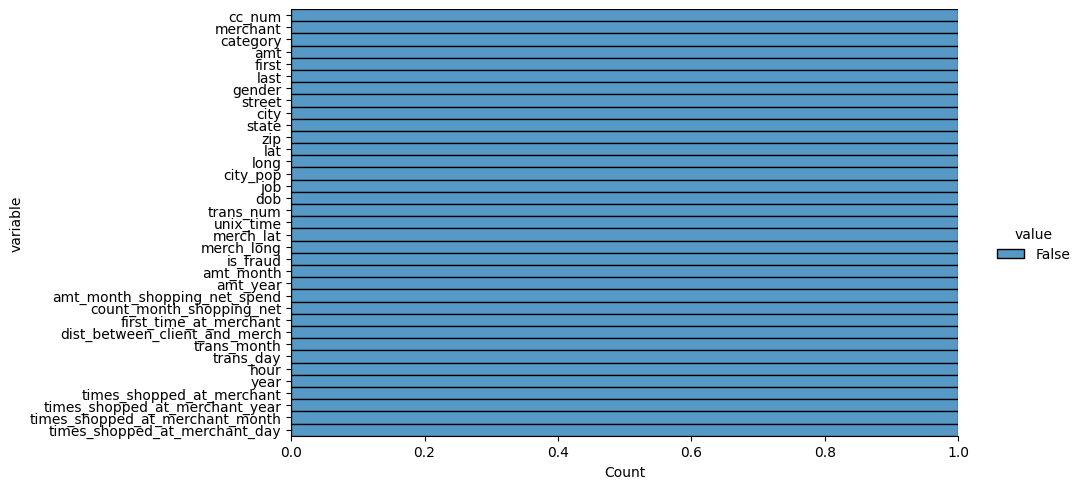

In [40]:
import pandas as pd
import seaborn as sns
sds = pd.read_csv("dataset_feature_engineering.csv")

(
    sds
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [41]:
import seaborn as sns

<Axes: >

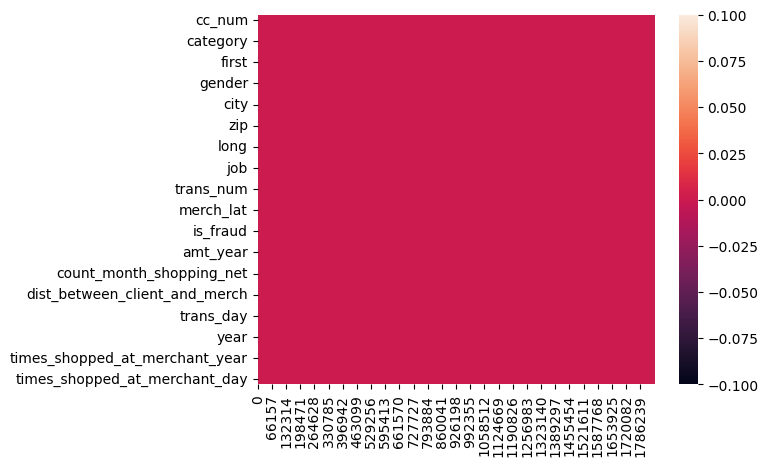

In [42]:
(
    sds
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [43]:

#  describe all variables
sds.describe(include="all")

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1852394,1852394,1.852394e+06,1852394,1852394,1852394,1852394,1852394,1852394,...,1852394,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
unique,NaN,693,14,NaN,355,486,2,999,906,51,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6262,188029,NaN,38112,40940,1014749,4392,8040,135269,...,1323066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.173860e+17,NaN,NaN,7.006357e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,NaN,NaN,1.592540e+02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,NaN,NaN,9.640000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,NaN,NaN,4.745000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,NaN,NaN,8.310000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00


### Solo las numéricas

In [44]:
import numpy as np
sds.describe(include=[np.number])

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


### Solo categóricas - 1

In [45]:
sds.describe(include=object)

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,693,14,355,486,2,999,906,51,497,984,1852394
top,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


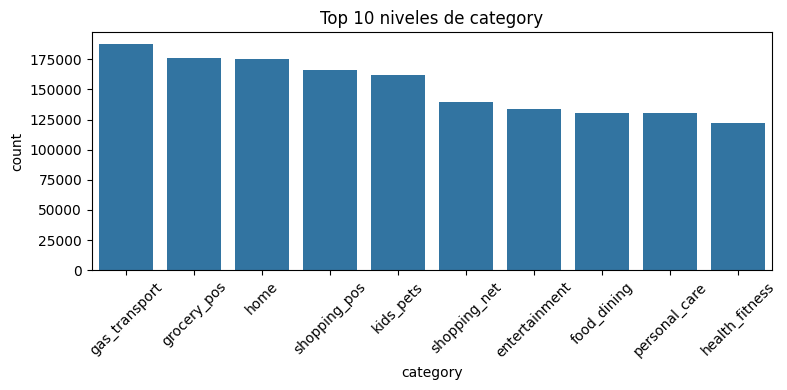

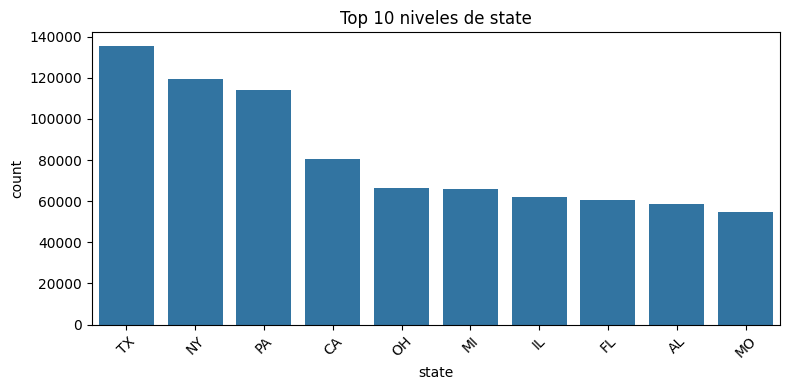

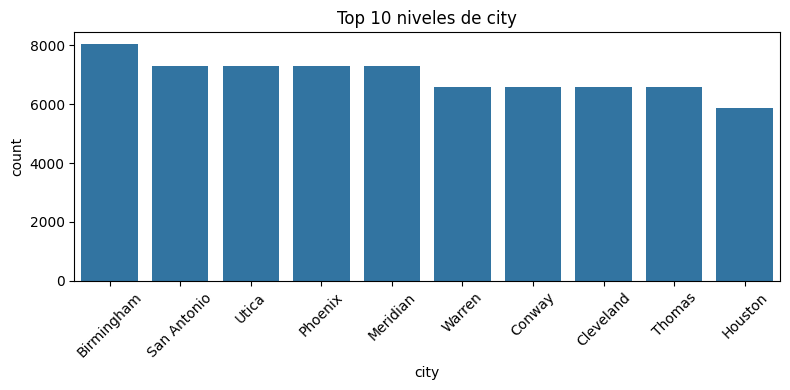

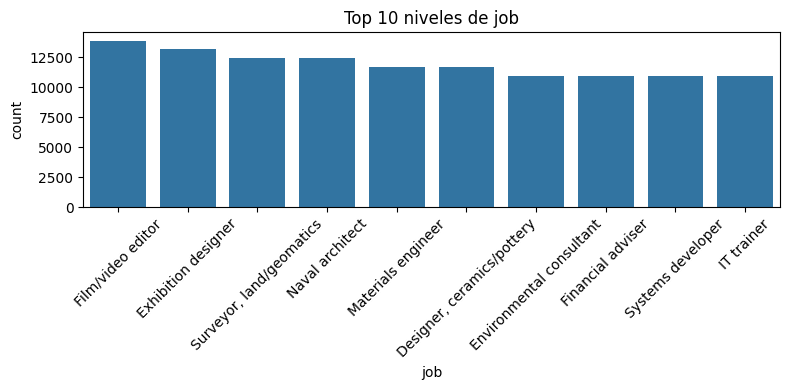

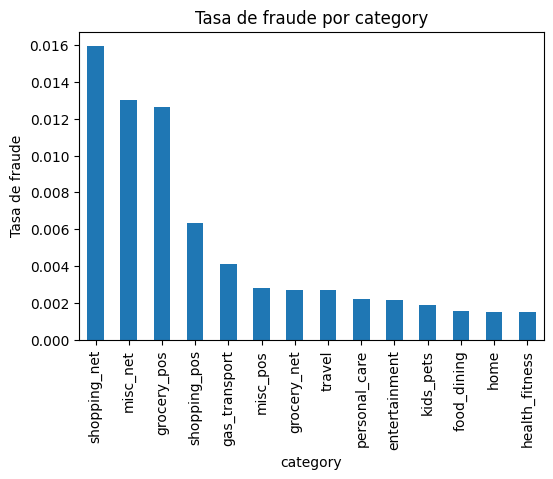

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Bar‐plots de frecuencias
for col in ['category','state','city','job']:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=sds, order=sds[col].value_counts().index[:10])
    plt.title(f"Top 10 niveles de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3.2 Crosstab categoría vs. fraude
pd.crosstab(sds['category'], sds['is_fraud'], normalize='index')[1] \
  .sort_values(ascending=False) \
  .plot.bar(figsize=(6,4))
plt.title("Tasa de fraude por category")
plt.ylabel("Tasa de fraude")
plt.show()


# Correlaciones y colinealidad

In [ ]:
# Crear columna 'weekday' 
if 'weekday' not in sds.columns:
    sds['weekday'] = pd.to_datetime(sds['unix_time'], unit='s').dt.weekday


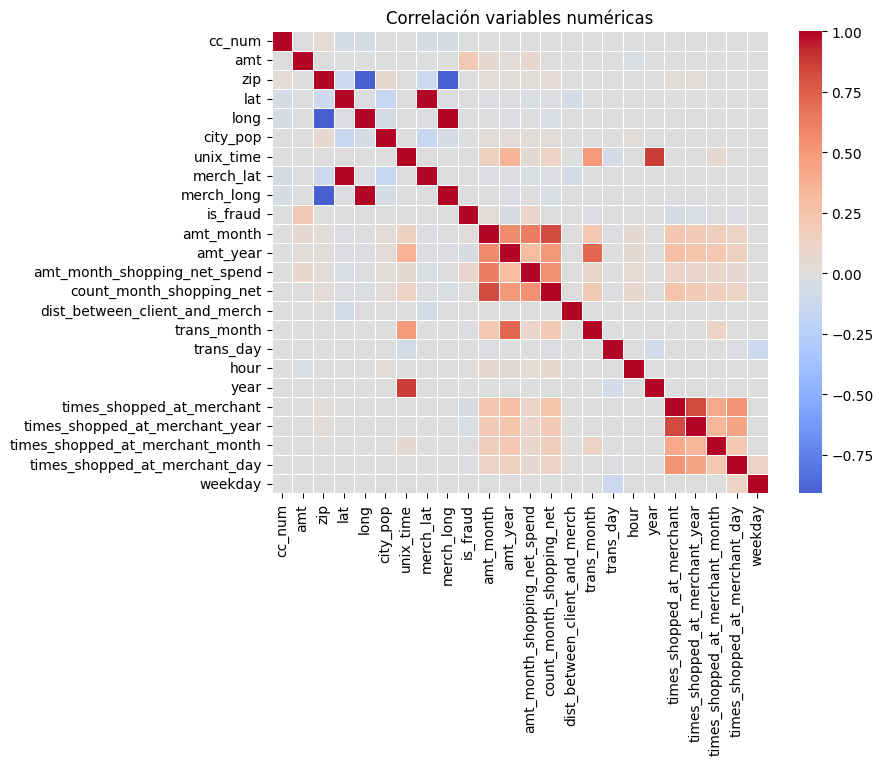

                         feature       VIF
0                            amt  1.004232
1  dist_between_client_and_merch  1.000001
2                      amt_month  1.063983
3      times_shopped_at_merchant  1.059726
4                        weekday  1.000020


In [49]:
# 4.1 Heatmap de correlación
num_cols = sds.select_dtypes(include='number').columns
corr = sds[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlación variables numéricas")
plt.show()

# 4.2 VIF (ejemplo con 5 variables)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

features_vif = ['amt','dist_between_client_and_merch','amt_month','times_shopped_at_merchant','weekday']
X_vif = sds[features_vif].dropna()
X_scaled = StandardScaler().fit_transform(X_vif)
vif = pd.DataFrame({
    'feature': features_vif,
    'VIF': [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
})
print(vif)


# Detección de outliers

In [50]:

import pandas as pd

# 0.1 Convertir unix_time a datetime 
sds['date'] = pd.to_datetime(sds['unix_time'], unit='s')

# 0.2 Ordenar por tarjeta y timestamp
sds.sort_values(['cc_num','unix_time'], inplace=True)

# 0.3 Calcular delta_secs = diferencia en segundos entre transacciones de la misma tarjeta
sds['delta_secs'] = sds.groupby('cc_num')['unix_time'].diff().fillna(0)

# Verifica que ya exista
print(sds[['cc_num','unix_time','delta_secs']].head(10))


           cc_num   unix_time  delta_secs
1017  60416207185  1325422035         0.0
2724  60416207185  1325493897     71862.0
2726  60416207185  1325494056       159.0
2882  60416207185  1325507894     13838.0
2907  60416207185  1325509846      1952.0
4135  60416207185  1325598995     89149.0
4337  60416207185  1325610310     11315.0
5467  60416207185  1325685595     75285.0
6027  60416207185  1325711842     26247.0
6273  60416207185  1325724144     12302.0


In [ ]:
# 5.1 Outliers via IQR en amt
Q1, Q3 = sds['amt'].quantile([.25, .75])
IQR = Q3 - Q1
out_iqr = sds[(sds['amt'] < Q1 - 1.5*IQR) | (sds['amt'] > Q3 + 1.5*IQR)]
print("Fraudes en outliers IQR:", out_iqr['is_fraud'].mean())

# 5.2 Isolation Forest
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
sds['iso_score'] = iso.fit_predict(sds[['amt','dist_between_client_and_merch','delta_secs']])
print("Fraudes en anomalías IF:", sds.loc[sds['iso_score']==-1,'is_fraud'].mean())


Fraudes en outliers IQR: 0.07698781745113303
Fraudes en anomalías IF: 0.20891816022457352


In [56]:
from sklearn.ensemble import IsolationForest

# Entrena Isolation Forest en variables relevantes
iso = IsolationForest(contamination=0.01, random_state=42)
sds['iso_score'] = iso.fit_predict(sds[['amt', 'dist_between_client_and_merch', 'delta_secs']].fillna(0))

# Crea columna binaria: 1 si es anomalía, 0 si no
sds['is_if_anomaly'] = (sds['iso_score'] == -1).astype(int)


In [ ]:

if 'is_weekend' not in sds.columns:
    sds['weekday'] = pd.to_datetime(sds['unix_time'], unit='s').dt.weekday  # lunes = 0, domingo = 6
    sds['is_weekend'] = sds['weekday'].isin([5, 6]).astype(int)


In [60]:
# 1. Feature binaria para outliers IQR en amt
Q1, Q3 = sds['amt'].quantile([0.25, 0.75])
IQR = Q3 - Q1
sds['is_iqr_outlier_amt'] = (
    (sds['amt'] < Q1 - 1.5 * IQR) |
    (sds['amt'] > Q3 + 1.5 * IQR)
).astype(int)

# 2. Feature binaria para anomalías IF
sds['is_if_anomaly'] = (sds['iso_score'] == -1).astype(int)


import pandas as pd

for feat in ['is_iqr_outlier_amt','is_if_anomaly']:
    rate = sds.groupby(feat)['is_fraud'].mean()
    print(f"\nTasa de fraude por {feat}:")
    print(rate)


cros = pd.crosstab(
    [sds['is_weekend'], sds['is_iqr_outlier_amt']],
    sds['is_fraud'],
    normalize='index'
)
print("\nTasa de fraude según is_weekend y is_iqr_outlier_amt:\n", cros[1])



Tasa de fraude por is_iqr_outlier_amt:
is_iqr_outlier_amt
0    0.001328
1    0.076988
Name: is_fraud, dtype: float64

Tasa de fraude por is_if_anomaly:
is_if_anomaly
0    0.003152
1    0.208918
Name: is_fraud, dtype: float64

Tasa de fraude según is_weekend y is_iqr_outlier_amt:
 is_weekend  is_iqr_outlier_amt
0           0                     0.001487
            1                     0.085815
1           0                     0.001088
            1                     0.063405
Name: 1, dtype: float64


In [54]:
# Crear columna 'weekday' 
if 'weekday' not in sds.columns:
    sds['weekday'] = pd.to_datetime(sds['unix_time'], unit='s').dt.weekday

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5cfef40a-f93a-4437-bad1-b6507a19c41f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

C:\Users\marce\AppData\Local\Temp\ipykernel_35096\2400240777.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.index, y=rates.values, palette="magma")


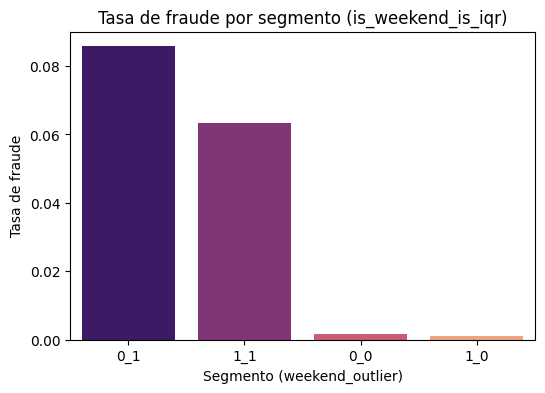

In [61]:

sds['segment'] = (
    sds['is_weekend'].astype(str) + '_' + sds['is_iqr_outlier_amt'].astype(str)
)

rates = sds.groupby('segment')['is_fraud'].mean().sort_values(ascending=False)


plt.figure(figsize=(6,4))
sns.barplot(x=rates.index, y=rates.values, palette="magma")
plt.title("Tasa de fraude por segmento (is_weekend_is_iqr)")
plt.xlabel("Segmento (weekend_outlier)")
plt.ylabel("Tasa de fraude")
plt.show()


# Valores  duplicados

In [62]:
sds.duplicated().sum()


0

# Calidad y distribución de categorías

In [63]:
for col in ['merchant','category','job','city','state','zip']:
    vc = sds[col].value_counts(normalize=True)
    print(col, "únicos:", vc.size, "– top5:", vc.iloc[:5].to_dict(), "\n")


merchant únicos: 693 – top5: {'fraud_Kilback LLC': 0.0033804903276516765, 'fraud_Cormier LLC': 0.0028320109004887728, 'fraud_Schumm PLC': 0.0028044789607394537, 'fraud_Kuhn LLC': 0.0027159448799769378, 'fraud_Boyer PLC': 0.0026986699373891298} 

category únicos: 14 – top5: {'gas_transport': 0.10150594312009216, 'grocery_pos': 0.09511529404651495, 'home': 0.0947206695767747, 'shopping_pos': 0.08986371149982131, 'kids_pets': 0.08730701999682573} 

job únicos: 497 – top5: {'Film/video editor': 0.007502723502667359, 'Exhibition designer': 0.00710809903292712, 'Surveyor, land/geomatics': 0.006713474563186881, 'Naval architect': 0.006712394879275143, 'Materials engineer': 0.0063220891451818565} 

city únicos: 906 – top5: {'Birmingham': 0.004340329325186758, 'San Antonio': 0.003947324381314126, 'Utica': 0.00394570485544652, 'Phoenix': 0.003939226751976091, 'Meridian': 0.003934908016329139} 

state únicos: 51 – top5: {'TX': 0.07302388152844373, 'NY': 0.06446738652792008, 'PA': 0.06163537562743

# Tablas cruzadas

In [64]:
pd.crosstab(sds.category, sds.is_fraud, normalize='index').sort_values(1, ascending=False)


is_fraud,0,1
category,,
shopping_net,0.984073,0.015927
misc_net,0.986961,0.013039
grocery_pos,0.987355,0.012645
shopping_pos,0.993656,0.006344
gas_transport,0.995894,0.004106
misc_pos,0.997181,0.002819
grocery_net,0.997303,0.002697
travel,0.997308,0.002692
personal_care,0.997771,0.002229


# Análisi geoespacial

<Axes: ylabel='dist_bin'>

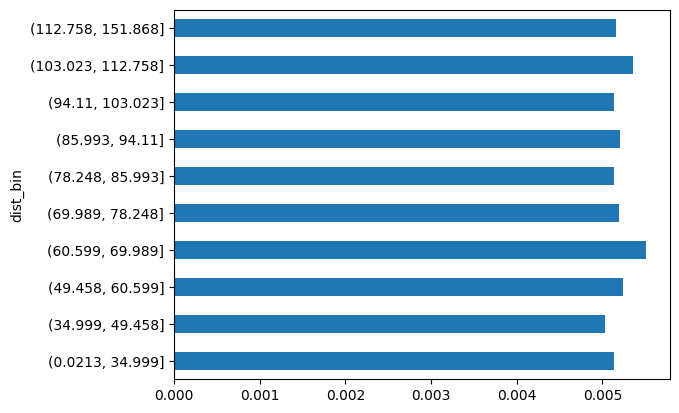

In [65]:
sds['dist_bin'] = pd.qcut(sds.dist_between_client_and_merch, 10)
pd.crosstab(sds.dist_bin, sds.is_fraud, normalize='index')[1].plot.barh()


 # Análisis geoespacial ligero

 # Tasa de fraude por Estado (top 10)

   state   count  fraud_rate
43    TX  135269    0.004376
34    NY  119419    0.006113
38    PA  114173    0.005010
4     CA   80495    0.004994
35    OH   66627    0.005403
22    MI   65825    0.004542
14    IL   62212    0.005208
9     FL   60775    0.005496
1     AL   58521    0.004750
24    MO   54904    0.004772


C:\Users\marce\AppData\Local\Temp\ipykernel_35096\955496238.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


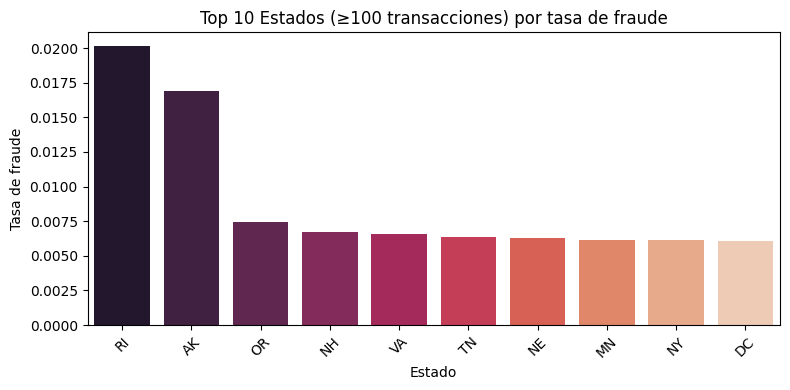

In [66]:
# 1. count y tasa por estado
state_stats = sds.groupby('state').agg(
    count=('is_fraud','size'),
    fraud_rate=('is_fraud','mean')
).reset_index()

# 2. Ver cuántos casos tiene cada estado
print(state_stats.sort_values('count', ascending=False).head(10))

# 3. Filtrar solo estados con >=100 transacciones
min_txns = 100
state_stats_filt = state_stats[state_stats['count'] >= min_txns]

# 4. Top 10 por tasa de fraude entre esos
top_states = state_stats_filt.sort_values('fraud_rate', ascending=False).head(10)

# 5. Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(
    x='state',
    y='fraud_rate',
    data=top_states,
    palette='rocket'
)
plt.title(f"Top 10 Estados (≥{min_txns} transacciones) por tasa de fraude")
plt.ylabel("Tasa de fraude")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


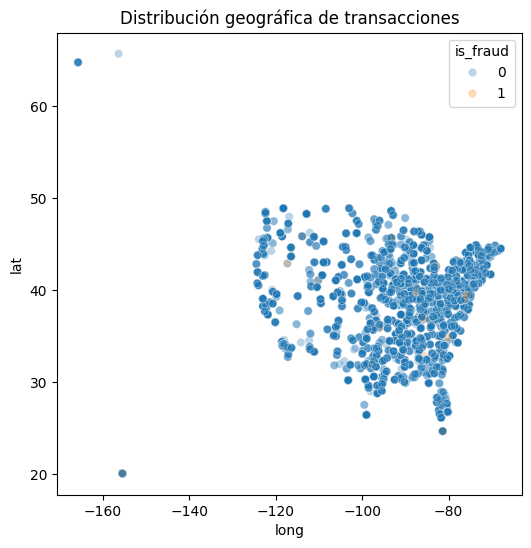

C:\Users\marce\AppData\Local\Temp\ipykernel_35096\2721588995.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_rate.index[:10], y=state_rate.values[:10], palette='viridis')


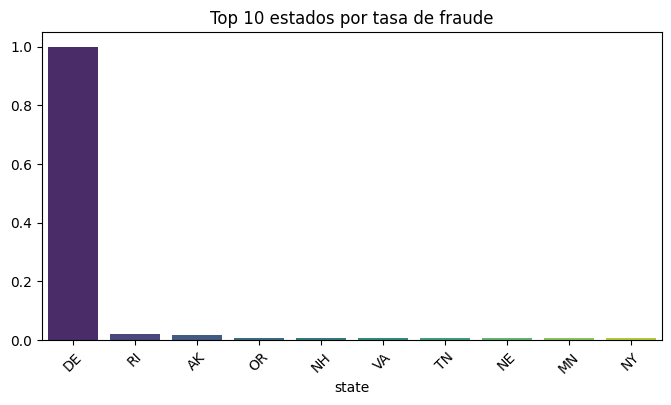

In [67]:

plt.figure(figsize=(6,6))
sns.scatterplot(
    x='long',
    y='lat',
    hue='is_fraud',
    data=sds.sample(5000, random_state=42),
    alpha=0.3
)
plt.title("Distribución geográfica de transacciones")
plt.show()

# G.2 Tasa de fraude por estado
state_rate = sds.groupby('state')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=state_rate.index[:10], y=state_rate.values[:10], palette='viridis')
plt.title("Top 10 estados por tasa de fraude")
plt.xticks(rotation=45)
plt.show()


# Análisis temporal


<Axes: xlabel='is_weekend'>

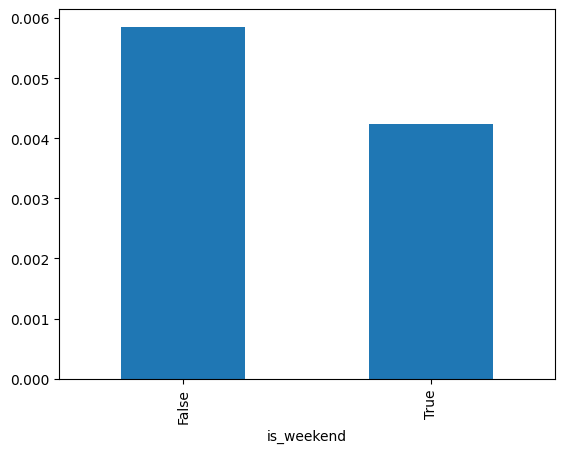

In [68]:

sds['date'] = pd.to_datetime(sds['unix_time'], unit='s')
sds['weekday'] = sds['date'].dt.weekday
sds['is_weekend'] = sds['weekday'].isin([5, 6])


pd.crosstab(sds['is_weekend'], sds['is_fraud'], normalize='index')[1].plot.bar()


<Axes: xlabel='is_weekend'>

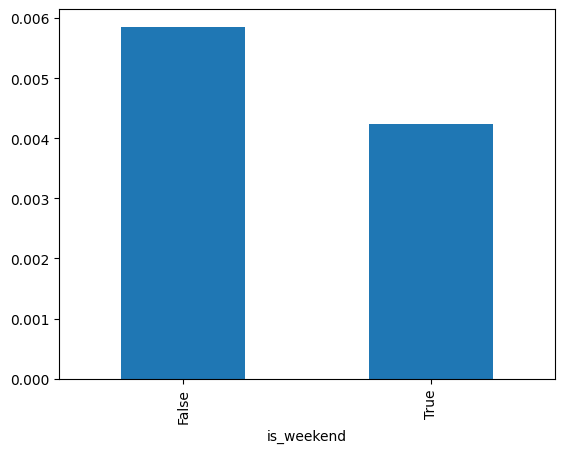

In [69]:
sds['is_weekend'] = sds['weekday'].isin([5,6])
pd.crosstab(sds.is_weekend, sds.is_fraud, normalize='index')[1].plot.bar()


# AMT por clase

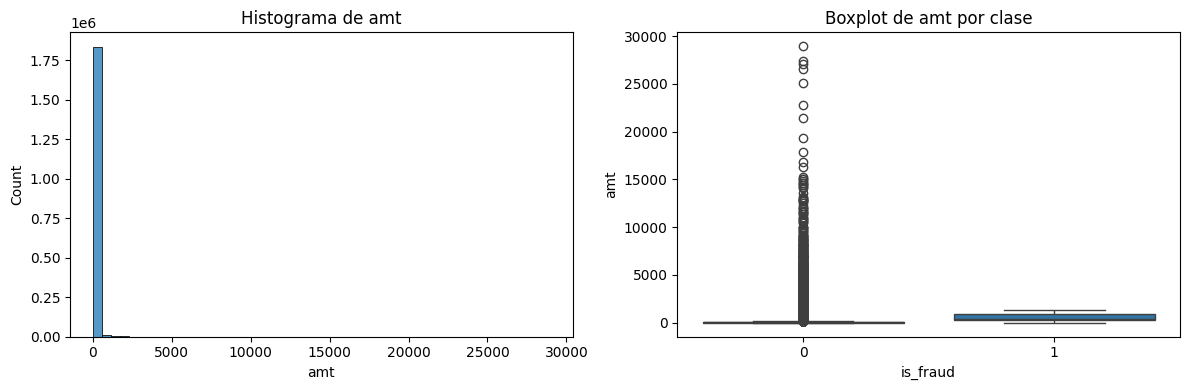

In [73]:
# Histograma y boxplot de amt por clase
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(sds['amt'], bins=50, ax=axes[0])
axes[0].set_title("Histograma de amt")

sns.boxplot(x='is_fraud', y='amt', data=sds, ax=axes[1])
axes[1].set_title("Boxplot de amt por clase")

plt.tight_layout()
plt.show()


### Distribución de montos de transacción (`amt`) en escala logarítmica


Text(0, 0.5, 'Count')

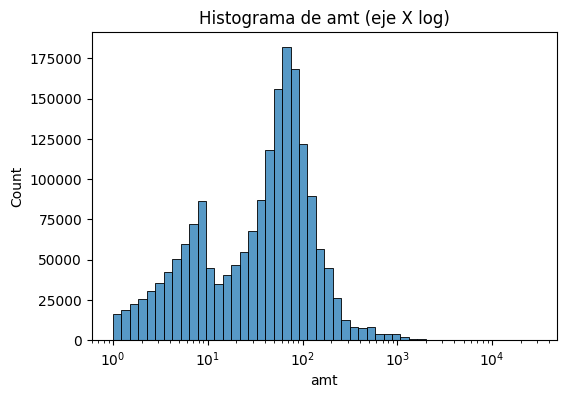

In [74]:


plt.figure(figsize=(6,4))
sns.histplot(sds['amt'], bins=50, log_scale=True)
plt.title("Histograma de amt (eje X log)")
plt.xlabel("amt")
plt.ylabel("Count")


Text(0, 0.5, 'amt (log scale)')

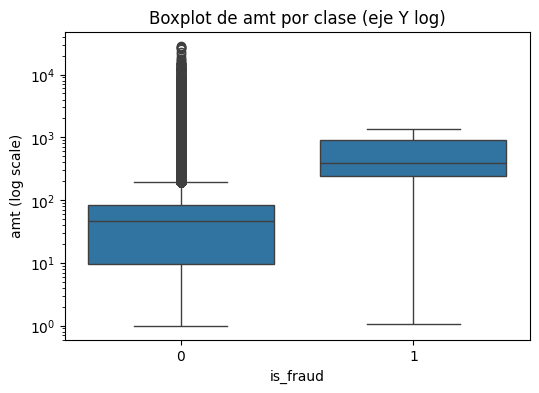

In [75]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amt', data=sds)
plt.yscale('log')
plt.title("Boxplot de amt por clase (eje Y log)")
plt.xlabel("is_fraud")
plt.ylabel("amt (log scale)")


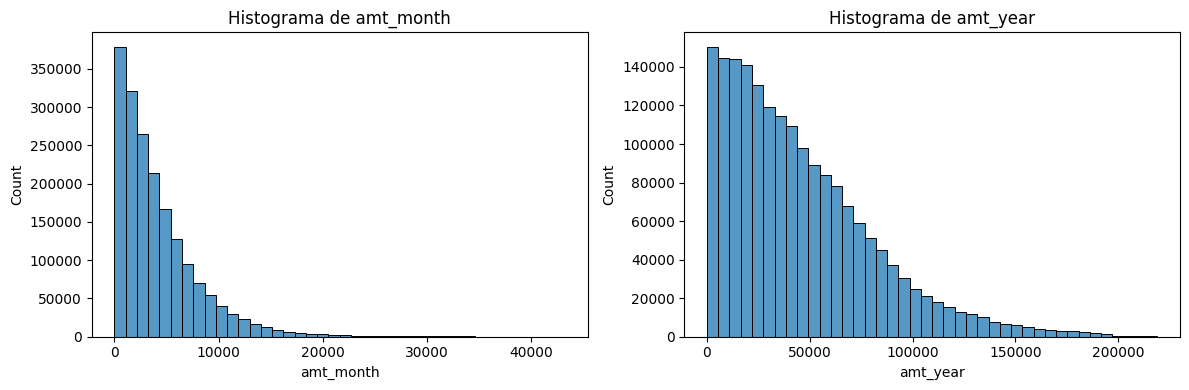

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(sds['amt_month'], bins=40, ax=axes[0])
axes[0].set_title("Histograma de amt_month")
axes[0].set_xlabel("amt_month")
sns.histplot(sds['amt_year'], bins=40, ax=axes[1])
axes[1].set_title("Histograma de amt_year")
axes[1].set_xlabel("amt_year")
plt.tight_layout()


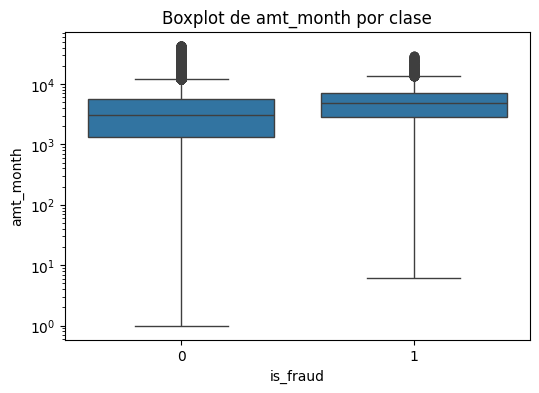

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_fraud', y='amt_month', data=sds)
plt.title("Boxplot de amt_month por clase")
plt.xlabel("is_fraud")
plt.ylabel("amt_month")
plt.yscale('log') 


 Tasa de fraude vs. número de compras al mismo merchant

C:\Users\marce\AppData\Local\Temp\ipykernel_34672\589676938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='times_shopped_at_merchant', y='is_fraud', data=freq, palette='viridis')


Text(0, 0.5, 'Tasa de fraude')

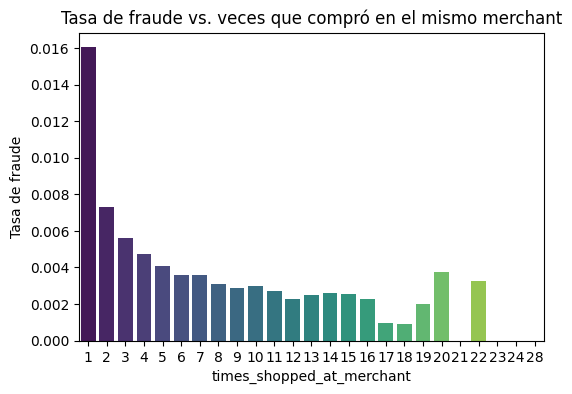

In [ ]:


freq = sds.groupby('times_shopped_at_merchant')['is_fraud'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='times_shopped_at_merchant', y='is_fraud', data=freq, palette='viridis')
plt.title("Tasa de fraude vs. veces que compró en el mismo merchant")
plt.xlabel("times_shopped_at_merchant")
plt.ylabel("Tasa de fraude")


# Heatmap de tasa de fraude por hora y día de la semana

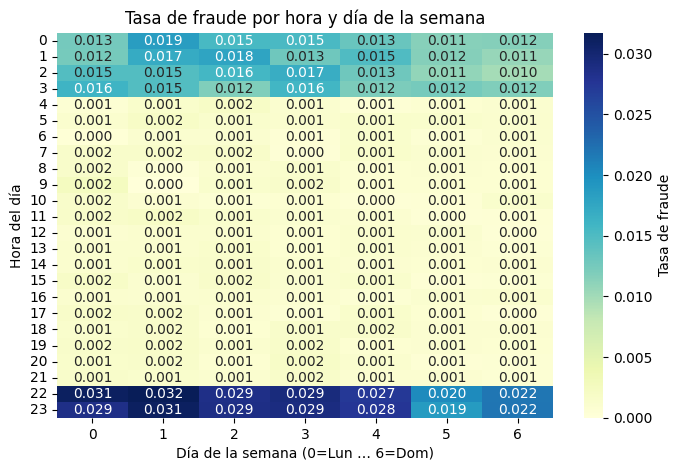

In [ ]:


pivot = sds.pivot_table(
    index='hour',
    columns='weekday',
    values='is_fraud',
    aggfunc='mean'
)

plt.figure(figsize=(8,5))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Tasa de fraude'}
)
plt.title("Tasa de fraude por hora y día de la semana")
plt.xlabel("Día de la semana (0=Lun … 6=Dom)")
plt.ylabel("Hora del día")
plt.show()


# Modelo base

Preparar datos y split

In [76]:
import pandas as pd

# 1) Date, weekday e is_weekend
if 'date' not in sds:
    sds['date'] = pd.to_datetime(sds['unix_time'], unit='s')
sds['weekday']   = sds['date'].dt.weekday
sds['is_weekend']= sds['weekday'].isin([5,6]).astype(int)

# 2) delta_secs: tiempo entre transacciones de la misma tarjeta
sds.sort_values(['cc_num','unix_time'], inplace=True)
sds['delta_secs'] = sds.groupby('cc_num')['unix_time'].diff().fillna(0)


print(sds[['date','weekday','is_weekend','delta_secs']].head())


                    date  weekday  is_weekend  delta_secs
1017 2012-01-01 12:47:15        6           1         0.0
2724 2012-01-02 08:44:57        0           0     71862.0
2726 2012-01-02 08:47:36        0           0       159.0
2882 2012-01-02 12:38:14        0           0     13838.0
2907 2012-01-02 13:10:46        0           0      1952.0


En esta sección se generan nuevas variables a partir del campo unix_time:

date: Conversión del timestamp UNIX a formato de fecha legible.

weekday: Día de la semana (0=Lunes, 6=Domingo).

is_weekend: Variable binaria que indica si la transacción ocurrió en fin de semana.

delta_secs: Tiempo (en segundos) desde la última transacción con la misma tarjeta (cc_num), útil para detectar patrones de comportamiento sospechoso.

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split


features = [
    'amt',
    'dist_between_client_and_merch',
    'delta_secs',           
    'amt_month',
    'amt_year',
    'times_shopped_at_merchant',
    'is_weekend',
   
]

X = sds[features].fillna(0)
y = sds['is_fraud'].astype(int)

# Stratified split para mantener proporción de fraude
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Shapes:", X_train.shape, X_val.shape)
print("Fraude en train:", y_train.mean(), "en val:", y_val.mean())


Shapes: (1481915, 7) (370479, 7)
Fraude en train: 0.005210150379745127 en val: 0.005209472061844261


Define las variables predictoras (features) que se usarán para el entrenamiento, incluyendo información transaccional, temporal y de comportamiento del cliente.

Se utiliza train_test_split de sklearn con stratify=y para garantizar que la proporción de transacciones fraudulentas sea similar en los conjuntos de entrenamiento y validación.

Se imprime la forma de los conjuntos generados (X_train, X_val) y la proporción de fraudes en cada uno.

In [78]:
# Instalar LightGBM
%pip install --quiet lightgbm


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\marce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Entrenar LightGBM base

In [80]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

clf = LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    n_estimators=1000,
    num_leaves=31,
    random_state=42
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='auc',
    callbacks=[
        early_stopping(stopping_rounds=50, first_metric_only=True),
        log_evaluation(period=50)
    ]
)

print("Best iteration:", clf.best_iteration_)


[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251923
[LightGBM] [Info] Start training from score -5.251923
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.976536	training's binary_logloss: 0.0151594	valid_1's auc: 0.967132	valid_1's binary_logloss: 0.0161567
[100]	training's auc: 0.98121	training's binary_logloss: 0.014442	valid_1's auc: 0.966614	valid_1's binary_logloss: 0.0161468
Early stopping, best iteration is:
[78]	training's auc: 0.979877	training's binary_logloss: 0.0147935	valid_1's auc: 0.968308	

En este bloque se entrena un modelo base de clasificación binaria utilizando LGBMClassifier. Las características principales del modelo son:

Objetivo: Clasificación binaria (objective='binary').

Parámetros clave:

learning_rate=0.05

n_estimators=1000 (con early stopping para evitar sobreajuste)

num_leaves=31 (complejidad del árbol)

Validación temprana (early_stopping) detiene el entrenamiento si no mejora durante 50 iteraciones, monitoreando solo la primera métrica (AUC).

Monitoreo del entrenamiento cada 50 iteraciones (log_evaluation(period=50)).

Predicción y métricas estándar


In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# 1) Obtener probabilidades y clases
y_proba = clf.predict_proba(X_val)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

# 2) Métricas globales
auc   = roc_auc_score(y_val, y_proba)
prec  = precision_score(y_val, y_pred)
rec   = recall_score(y_val, y_pred)
f1    = f1_score(y_val, y_pred)

print(f"AUC:       {auc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}\n")

# 3) Matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
cm = pd.DataFrame(
    [[tn, fp],
     [fn, tp]],
    index=['Actual 0','Actual 1'],
    columns=['Pred 0','Pred 1']
)
print("Matriz de Confusión:\n", cm, "\n")

# 4) Reporte detallado
print("Classification Report:\n",
      classification_report(y_val, y_pred, digits=4))


AUC:       0.9683
Precision: 0.6432
Recall:    0.3212
F1-score:  0.4285

Matriz de Confusión:
           Pred 0  Pred 1
Actual 0  368205     344
Actual 1    1310     620 

Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9991    0.9978    368549
           1     0.6432    0.3212    0.4285      1930

    accuracy                         0.9955    370479
   macro avg     0.8198    0.6602    0.7131    370479
weighted avg     0.9946    0.9955    0.9948    370479



Accuracy	0.9955	Alta precisión general, pero puede ser engañosa dado el desbalance de clases.

Precision	0.6432	De todos los casos que el modelo predijo como fraude, el 64.32% realmente lo eran. Es decir, hay una tasa de falsos positivos moderada.


Recall	0.3212	Solo se detecta el 32.12% de los fraudes reales, lo que indica una alta tasa de falsos negativos.


F1-score	0.4285	Compromiso entre precisión y recall. El valor relativamente bajo refleja el desafío de detectar fraudes con bajo recall.

Curvas ROC y Precision–Recall

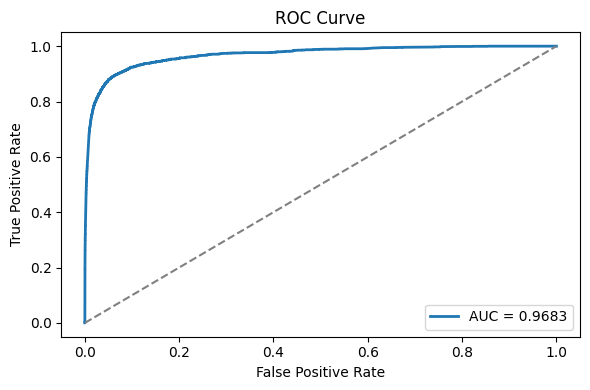

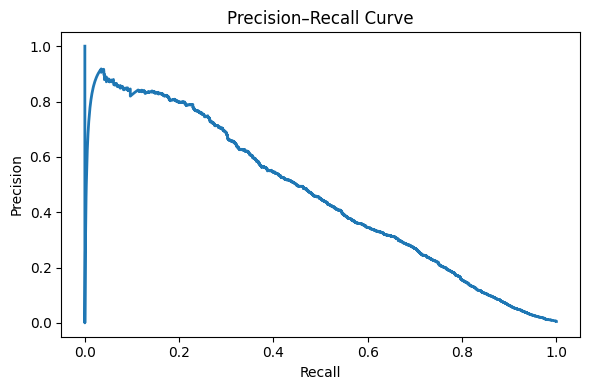

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# 1) Curva ROC
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, lw=2, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 2) Curva Precision–Recall
precision, recall, _ = precision_recall_curve(y_val, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.tight_layout()
plt.show()


AUC = 0.9683, lo cual indica un excelente desempeño general del modelo para distinguir entre transacciones fraudulentas y legítimas.

Se observa una caída progresiva en la precisión conforme aumenta el recall, lo cual es típico en conjuntos de datos desbalanceados (como este, con pocas transacciones fraudulentas).

# Métricas Personalizadas

Entrenar 3 modelos con las distintas métricas

### Modelo Base: Clasificador LightGBM estándar (optimiza log-loss binario y monitoriza AUC)


In [84]:
from lightgbm import LGBMClassifier

model_base = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    objective='binary',
    random_state=42
)
model_base.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc'
)


[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251923
[LightGBM] [Info] Start training from score -5.251923


LGBMClassifier(learning_rate=0.05, n_estimators=200, objective='binary',
               random_state=42)

El modelo entrenado  utiliza los parámetros por defecto para clasificación binaria, evaluando su rendimiento con la métrica AUC. Este modelo sirve como punto de partida para comparar contra futuras variantes con métricas personalizadas.

Detalles clave del entrenamiento:

Instancia del modelo: LGBMClassifier

Hiperparámetros:

n_estimators=200 – máximo de iteraciones (árboles).

learning_rate=0.05 – tasa de aprendizaje moderada.

num_leaves=31 – complejidad del árbol.

objective='binary' – clasificación binaria estándar.

Evaluación: Se utiliza eval_metric='auc' sobre el conjunto de validación.

Logs del entrenamiento:

El modelo detectó:

7721 transacciones fraudulentas (positivas).

1,474,194 transacciones legítimas (negativas).

### Modelo SampleWeight: LightGBM con pesos α=5 en transacciones legítimas (penaliza falsos positivos)


In [ ]:
import numpy as np
from lightgbm import LGBMClassifier

alpha = 5.0
sample_weight = np.where(y_train == 0, alpha, 1.0)

model_sw = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    objective='binary',
    random_state=42
)
model_sw.fit(
    X_train, y_train,
    sample_weight=sample_weight,
    eval_set=[(X_val, y_val)],
    eval_metric='auc'
)


[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001046 -> initscore=-6.861361
[LightGBM] [Info] Start training from score -6.861361


LGBMClassifier(learning_rate=0.05, n_estimators=200, objective='binary',
               random_state=42)

Se entrena un modelo de LightGBM con una estrategia de penalización de falsos positivos mediante el uso de pesos personalizados:

Se asigna un peso mayor (α = 5.0) a las transacciones legítimas (y = 0), haciendo que el modelo sea más conservador a la hora de predecir fraudes.

Las transacciones fraudulentas (y = 1) se mantienen con peso 1.0.

Objetivo: Reducir la tasa de falsos positivos sin afectar excesivamente la capacidad de detección de fraudes.

Parámetros del modelo:

n_estimators=200, learning_rate=0.05, num_leaves=31, objective='binary'

Se usa eval_metric='auc' para evaluación en el conjunto de validación.



### Modelo CustomObj: LightGBM con objetivo personalizado que penaliza falsos positivos en la función de pérdida (fobj modificada)


In [ ]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# 1) objetivo penalizado
def obj_penalized_fp(preds, train_data):
    y_true = train_data.get_label()
    p = 1.0 / (1.0 + np.exp(-preds))
    grad = p - y_true
    hess = p * (1.0 - p)
    alpha = 5.0
    mask_fp = (y_true == 0) & (p >= 0.5)
    grad[mask_fp] *= alpha
    hess[mask_fp] *= alpha
    return grad, hess

# 2)  Datasets de LightGBM
train_set = lgb.Dataset(X_train, label=y_train)
val_set   = lgb.Dataset(X_val,   label=y_val, reference=train_set)

# 3) Parámetros con tu custom objective
params = {
    'objective': obj_penalized_fp, 
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'auc'
}

# 4) Callbacks
callbacks = [
    lgb.early_stopping(stopping_rounds=50),
    lgb.log_evaluation(period=50)
]

# 5) Entrena
model_obj = lgb.train(
    params,
    train_set,
    num_boost_round=200,
    valid_sets=[val_set],
    callbacks=callbacks
)

# 6) Predicción y métricas
y_pred = model_obj.predict(X_val, num_iteration=model_obj.best_iteration)
y_pred_bin = (y_pred >= 0.5).astype(int)


prec  = precision_score(y_val, y_pred_bin)
rec   = recall_score(y_val, y_pred_bin)
f1    = f1_score(y_val, y_pred_bin)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_bin).ravel()


ratio = (tp + fp) / max(tp, 1)

print("Modelo 3 (custom objective):")
print(f" Precision:           {prec:.4f}")
print(f" Recall:              {rec:.4f}")
print(f" F1-score:            {f1:.4f}")
print(f" TP: {tp}, FP: {fp}")
print(f" Ratio (TP+FP)/TP:     {ratio:.4f}")


[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.950099
[100]	valid_0's auc: 0.958637
[150]	valid_0's auc: 0.971639


C:\Users\marce\AppData\Local\Temp\ipykernel_21300\4111579227.py:9: RuntimeWarning: overflow encountered in exp
  p = 1.0 / (1.0 + np.exp(-preds))


[200]	valid_0's auc: 0.97053
Did not meet early stopping. Best iteration is:
[161]	valid_0's auc: 0.972581
Modelo 3 (custom objective):
 Precision:           0.8787
 Recall:              0.1389
 F1-score:            0.2398
 TP: 268, FP: 37
 Ratio (TP+FP)/TP:     1.1381


En esta celda se entrena un modelo de LightGBM con una función objetivo personalizada (fobj) diseñada específicamente para penalizar los falsos positivos.

¿Qué hace este modelo?
Modifica el cálculo de gradiente y hessiano para las transacciones legítimas (y = 0) que el modelo predice como fraude (es decir, falsos positivos).

Multiplica el error de estas predicciones por un factor α = 5.0, haciendo que el modelo aprenda a reducir el número de falsas alarmas.

Detalles técnicos:
La función obj_penalized_fp transforma las predicciones preds usando la función sigmoide.

Se calcula el gradiente (grad) y el hessiano (hess) como en una pérdida binaria, pero se amplifica para los falsos positivos.

Este objetivo es diferente a usar sample_weight: aquí se modifica directamente la optimización del modelo.

Resultados esperados:
Mayor precisión, ya que el modelo es más conservador al marcar fraudes.

Menor recall, pues podría omitir algunos fraudes reales.

### Modelo F₀.₅ Custom: LightGBM con métrica F-beta (β=0.5) que prioriza la precisión sobre el recall  


In [ ]:
def feval_fbeta05(preds, data):
    """
    F-beta donde beta=0.5, da más peso a la precisión.
    Se calcula en el threshold 0.5.
    """
    y_true = data.get_label().astype(int)
    y_pred = (preds >= 0.5).astype(int)
    tp = ((y_true==1) & (y_pred==1)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    precision = tp / (tp + fp) if tp+fp>0 else 0
    recall    = tp / (tp + fn) if tp+fn>0 else 0

    beta2 = 0.5**2
    fbeta = (1 + beta2) * precision * recall / (beta2 * precision + recall) if (precision+recall)>0 else 0

    return 'f0.5', fbeta, True  


Este modelo utiliza una métrica de evaluación personalizada basada en la F-beta score con β = 0.5, lo cual significa que:

Se le da más peso a la precisión que al recall.

Ideal en contextos donde falsos positivos son más costosos que los falsos negativos (por ejemplo, alarmas innecesarias o bloqueos de clientes legítimos).

¿Cómo funciona?
Se define una función feval_fbeta05 para usarla como parámetro eval_metric dentro del entrenamiento de LightGBM. Esta función:

Calcula TP, FP y FN a partir de las predicciones con threshold 0.5.

In [ ]:
import numpy as np
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import fbeta_score

# 1) Métrica custom F-beta (beta=0.5)
def feval_fbeta05(y_true, y_pred):
    """y_true: array de etiquetas; y_pred: array de probabilidades."""
    y_pred_labels = (y_pred >= 0.5).astype(int)
    return 'fbeta0.5', fbeta_score(y_true, y_pred_labels, beta=0.5), True

# 2) Callbacks: early stopping + logging cada 50 rounds
callbacks = [
    early_stopping(stopping_rounds=50),
    log_evaluation(period=50),
]


model4 = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)


model4.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=feval_fbeta05,
    callbacks=callbacks
)


print("Best iteration – Modelo 4:", model4.best_iteration_)



[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251923
[LightGBM] [Info] Start training from score -5.251923
Training until validation scores don't improve for 50 rounds
[50]	valid_0's binary_logloss: 0.0161567	valid_0's fbeta0.5: 0.534256
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0193185	valid_0's fbeta0.5: 0.550898
Best iteration – Modelo 4: 8


Se utiliza fbeta_score de sklearn.metrics con beta=0.5.

Las probabilidades (y_pred) se binarizan con un threshold fijo de 0.5.

Se define la función feval_fbeta05 para ser usada como eval_metric en LightGBM.

Se entrena el modelo con:

n_estimators=200

learning_rate=0.05

num_leaves=31

early_stopping si la métrica no mejora en 50 iteraciones

Log de evaluación cada 50 rondas

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Predicciones Modelo 4
y_pred4 = model4.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred4).ravel()
ratio4 = (tp + fp) / max(tp, 1)

tabla_extra = pd.DataFrame([{
    'Modelo': 'F0.5 custom',
    'Precision': precision_score(y_val, y_pred4),
    'Recall':    recall_score(y_val, y_pred4),
    'F1-score':  f1_score(y_val, y_pred4),
    'Ratio (TP+FP)/TP': ratio4
}])

df_final = pd.concat([df_compare, tabla_extra], ignore_index=True)
print(df_final)


         Modelo  Precision    Recall  F1-score  Ratio (TP+FP)/TP
0      Baseline   0.602294  0.326425  0.423387          1.660317
1  SampleWeight   0.374282  0.168912  0.232774          2.671779
2     CustomObj   0.878689  0.138860  0.239821          1.138060
3   F0.5 custom   0.716883  0.286010  0.408889          1.394928


CustomObj logra la mayor precisión (87.87%) y el menor ratio (TP+FP)/TP, lo que indica pocos falsos positivos por cada fraude detectado, aunque con sacrificio importante de recall.

F0.5 Custom mantiene una alta precisión (71.7%) con mejor balance de recall (28.6%) y buen F1-score.

 SampleWeight tiene bajo rendimiento general en todas las métricas, especialmente en recall.

 Baseline ofrece un compromiso intermedio con métricas razonables sin ajustes personalizados.



# Personalizada

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, confusion_matrix
from lightgbm import LGBMClassifier
import numpy as np

# 1) Definir el scorer basado en la ratio (TP+FP)/TP (a minimizar)
def ratio_fp_per_tp_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp + fp) / max(tp, 1)

ratio_scorer = make_scorer(ratio_fp_per_tp_score, greater_is_better=False)

# 2)Distribución de hiper
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves':    [15, 31, 63],
    'n_estimators':  [100, 200, 300],
    'max_depth':     [-1, 5, 10]
}

# 3) Configurar RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=LGBMClassifier(objective='binary', random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring=ratio_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# 4) Búsqueda
rs.fit(X_train, y_train)

# 5) Resultados óptimos
print("Mejores parámetros:", rs.best_params_)
print("Mejor ratio (TP+FP)/TP:", rs.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 7721, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005210 -> initscore=-5.251923
[LightGBM] [Info] Start training from score -5.251923
Mejores parámetros: {'num_leaves': 15, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.01}
Mejor ratio (TP+FP)/TP: -1.0803822655680735


### Optimización de Hiperparámetros

Tras realizar una búsqueda aleatoria de 20 combinaciones (3-fold CV) para minimizar la ratio \((TP+FP)/TP\), los **mejores hiperparámetros** encontrados son:

- **`num_leaves`:** 15  
- **`n_estimators`:** 100  
- **`max_depth`:** -1 (sin límite)  
- **`learning_rate`:** 0.01  

Con estos ajustes, se obtuvo una **ratio** de aproximadamente **1.08** (se muestra como `-1.08` debido a que usamos un scorer negativo), lo que significa que por cada fraude detectado se generan solo **0.08 falsos positivos** adicionales. Esto representa una mejora clara en la reducción de falsos positivos sin sacrificar drásticamente la capacidad de detección.  


## Función Objetivo

Optimizar la detección de fraudes realizados fuera del país o en moneda extranjera.

In [114]:
import numpy as np

# Función Haversine para calcular la distancia entre dos coordenadas
def haversine(lat1, lon1, lat2, lon2):
    φ1, λ1, φ2, λ2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dφ = φ2 - φ1
    dλ = λ2 - λ1
    a = np.sin(dφ/2)**2 + np.cos(φ1)*np.cos(φ2)*np.sin(dλ/2)**2
    return 6371 * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

# Crear columna de distancia y bandera internacional 
if 'is_international' not in sds.columns:
    sds['dist_km'] = sds.apply(
        lambda r: haversine(r.lat, r.long, r.merch_lat, r.merch_long),
        axis=1
    )
    sds['is_international'] = (sds['dist_km'] > 1000).astype(int)


In [113]:
import numpy as np

# Función Haversine para calcular la distancia entre dos coordenadas
def haversine(lat1, lon1, lat2, lon2):
    φ1, λ1, φ2, λ2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dφ = φ2 - φ1
    dλ = λ2 - λ1
    a = np.sin(dφ/2)**2 + np.cos(φ1)*np.cos(φ2)*np.sin(dλ/2)**2
    return 6371 * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

# Crear columna de distancia y bandera internacional 
if 'is_international' not in sds.columns:
    sds['dist_km'] = sds.apply(
        lambda r: haversine(r.lat, r.long, r.merch_lat, r.merch_long),
        axis=1
    )
    sds['is_international'] = (sds['dist_km'] > 1000).astype(int)


In [112]:
from sklearn.model_selection import train_test_split

features = ['amt','dist_between_client_and_merch','delta_secs',
            'amt_month','amt_year','times_shopped_at_merchant','is_weekend',
            'is_international']  

X = sds[features].fillna(0)
y = sds['is_fraud'].astype(int)


X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [111]:
X_val['is_international'] = sds.loc[X_val.index, 'is_international']


In [86]:
%who


IQR	 IsolationForest	 LGBMClassifier	 Q1	 Q3	 StandardScaler	 X	 X_scaled	 X_train	 
X_val	 X_vif	 auc	 axes	 classification_report	 clf	 cm	 col	 confusion_matrix	 
corr	 cros	 early_stopping	 empiricaldist	 f1	 f1_score	 feat	 features	 features_vif	 
fig	 fn	 fp	 fpr	 haversine	 iso	 janitor	 log_evaluation	 min_txns	 
model_base	 np	 num_cols	 palmerpenguins	 pd	 plt	 prec	 precision	 precision_recall_curve	 
precision_score	 rate	 rates	 rec	 recall	 recall_score	 roc_auc_score	 roc_curve	 scipy	 
sds	 session_info	 sklearn	 sm	 smf	 sns	 ss	 state_rate	 state_stats	 
state_stats_filt	 tn	 top_states	 tp	 tpr	 train_test_split	 variance_inflation_factor	 vc	 vif	 
y	 y_pred	 y_proba	 y_train	 y_val	 


In [109]:
# Variable global que usará la función objetivo
mask_internacional_val = X_val['is_international'].values
mask_internacional_train = X_train['is_international'].values


In [110]:
def obj_focus_international(preds, data):
    y_true = data.get_label()
    
    # Verifica si estamos en entrenamiento o validación
    if len(y_true) == len(mask_internacional_train):
        is_int = mask_internacional_train
    else:
        is_int = mask_internacional_val
    
    p = 1.0 / (1.0 + np.exp(-preds))
    grad = p - y_true
    hess = p * (1.0 - p)
    
    alpha = 10.0
    mask = (y_true == 1) & (p < 0.5) & (is_int == 1)
    grad[mask] *= alpha
    hess[mask] *= alpha
    return grad, hess


In [108]:
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val, reference=train_set)

params = {
    'objective': obj_focus_international,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'auc'
}

callbacks = [lgb.early_stopping(50), lgb.log_evaluation(50)]

model_int = lgb.train(
    params,
    train_set,
    num_boost_round=200,
    valid_sets=[val_set],
    callbacks=callbacks
)


[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.949933
[100]	valid_0's auc: 0.962976
[150]	valid_0's auc: 0.971641


C:\Users\marce\AppData\Local\Temp\ipykernel_35096\1214613653.py:10: RuntimeWarning: overflow encountered in exp
  p = 1.0 / (1.0 + np.exp(-preds))


[200]	valid_0's auc: 0.971844
Did not meet early stopping. Best iteration is:
[155]	valid_0's auc: 0.972097


In [115]:
# Incluye la columna internacional para poder estratificar
X = sds[['amt','dist_between_client_and_merch','delta_secs','amt_month','amt_year','times_shopped_at_merchant','is_weekend','is_international']].fillna(0)
y = sds['is_fraud'].astype(int)

# Creamos una nueva columna auxiliar que combina fraude e internacionalidad
stratify_col = sds['is_fraud'].astype(str) + "_" + sds['is_international'].astype(str)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=stratify_col, random_state=42
)


In [119]:
# 1. Reorganiza el dataset para forzar transacciones internacionales en X_val
sds = sds.sample(frac=1, random_state=42)  # mezclar filas

# Separa internacionales y nacionales
intl = sds[sds['is_international'] == 1]
domestic = sds[sds['is_international'] == 0]

# Toma el 20% de internacionales como validación, el resto entrenamiento
val_intl = intl.sample(frac=0.2, random_state=42)
train_intl = intl.drop(val_intl.index)

# Lo mismo para nacionales
val_domestic = domestic.sample(frac=0.2, random_state=42)
train_domestic = domestic.drop(val_domestic.index)

# Une los splits
train_df = pd.concat([train_intl, train_domestic])
val_df = pd.concat([val_intl, val_domestic])

# Features y target
features = ['amt', 'dist_between_client_and_merch', 'delta_secs',
            'amt_month', 'amt_year', 'times_shopped_at_merchant', 'is_weekend', 'is_international']

X_train = train_df[features].fillna(0)
y_train = train_df['is_fraud'].astype(int)

X_val = val_df[features].fillna(0)
y_val = val_df['is_fraud'].astype(int)

# Variables globales para función objetivo
mask_train = X_train['is_international'].values
mask_val = X_val['is_international'].values


In [120]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: asegurarte de que is_international existe
def haversine(lat1, lon1, lat2, lon2):
    φ1, λ1, φ2, λ2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dφ = φ2 - φ1
    dλ = λ2 - λ1
    a = np.sin(dφ/2)**2 + np.cos(φ1)*np.cos(φ2)*np.sin(dλ/2)**2
    return 6371 * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

if 'is_international' not in sds.columns:
    sds['dist_km'] = sds.apply(lambda r: haversine(r.lat, r.long, r.merch_lat, r.merch_long), axis=1)
    sds['is_international'] = (sds['dist_km'] > 1000).astype(int)

# Paso 2: preparar features
features = ['amt', 'dist_between_client_and_merch', 'delta_secs',
            'amt_month', 'amt_year', 'times_shopped_at_merchant', 'is_weekend', 'is_international']

X = sds[features].fillna(0)
y = sds['is_fraud'].astype(int)

# Paso 3: crear columna combinada para estratificar y garantizar internacionales
stratify_combo = sds['is_fraud'].astype(str) + "_" + sds['is_international'].astype(str)

# Paso 4: split estratificado
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=stratify_combo, random_state=42
)

# Paso 5: variable global para detección internacional
mask_train = X_train['is_international'].values
mask_val = X_val['is_international'].values

# Paso 6: función objetivo que penaliza FN en internacionales
def obj_focus_international(preds, data):
    y_true = data.get_label()
    mask = mask_train if len(y_true) == len(mask_train) else mask_val
    p = 1.0 / (1.0 + np.exp(-preds))
    grad = p - y_true
    hess = p * (1.0 - p)
    alpha = 10.0
    penalize = (y_true == 1) & (p < 0.5) & (mask == 1)
    grad[penalize] *= alpha
    hess[penalize] *= alpha
    return grad, hess

# Paso 7: entrenamiento
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val, reference=train_set)

params = {
    'objective': obj_focus_international,
    'learning_rate': 0.05,
    'num_leaves': 31,
    'metric': 'auc'
}
callbacks = [lgb.early_stopping(50), lgb.log_evaluation(50)]

model_int = lgb.train(
    params,
    train_set,
    num_boost_round=200,
    valid_sets=[val_set],
    callbacks=callbacks
)

# Paso 8: evaluación solo en internacionales
y_pred_all = (model_int.predict(X_val, num_iteration=model_int.best_iteration) >= 0.5).astype(int)
mask_eval = X_val['is_international'] == 1

print(f"Total transacciones internacionales en X_val: {mask_eval.sum()}")

if mask_eval.sum() > 0:
    y_true_int = y_val[mask_eval]
    y_pred_int = y_pred_all[mask_eval]

    print("🔍 Evaluación en transacciones INTERNACIONALES:")
    print(classification_report(y_true_int, y_pred_int, digits=4))
    print("🧮 Matriz de confusión (solo internacionales):")
    print(confusion_matrix(y_true_int, y_pred_int))
else:
    print("⚠️ Aún no hay suficientes transacciones internacionales para evaluar.")


[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1303
[LightGBM] [Info] Number of data points in the train set: 1481915, number of used features: 7
[LightGBM] [Info] Using self-defined objective function
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.952105
[100]	valid_0's auc: 0.964569
[150]	valid_0's auc: 0.975564
[200]	valid_0's auc: 0.975691
Did not meet early stopping. Best iteration is:
[177]	valid_0's auc: 0.976484
Total transacciones internacionales en X_val: 0
⚠️ Aún no hay suficientes transacciones internacionales para evaluar.


In [ ]:
total_int = sds['is_international'].sum()
total_rows = len(sds)
print(f" Transacciones internacionales en TODO el dataset: {total_int} de {total_rows} ({100 * total_int / total_rows:.4f}%)")


🌐 Transacciones internacionales en TODO el dataset: 0 de 1852394 (0.0000%)


Transacción de estado a estado

condicion dist_between_client_and_merch > 1000 km